In [5]:
# import necessary libraries
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [6]:
# Define universe of discourse
x = np.arange(0, 101, 1)

# Define fuzzy variables
occupancy = ctrl.Antecedent(np.arange(0, 101, 1), 'occupancy')
lighting = ctrl.Antecedent(np.arange(0, 101, 1), 'lighting')
aircond = ctrl.Antecedent(np.arange(0, 101, 1), 'aircond')
efficiency = ctrl.Consequent(np.arange(0, 101, 1), 'energy efficiency')

# Membership functions for Occupancy Level
occupancy['low'] = fuzz.trimf(occupancy.universe, [0, 0, 30])
occupancy['medium'] = fuzz.trimf(occupancy.universe, [20, 50, 80])
occupancy['high'] = fuzz.trimf(occupancy.universe, [70, 100, 100])

# Membership functions for Lighting Intensity
lighting['dim'] = fuzz.trapmf(lighting.universe, [0, 0, 20, 40])
lighting['moderate'] = fuzz.trimf(lighting.universe, [30, 50, 70])
lighting['bright'] = fuzz.trapmf(lighting.universe, [60, 80, 100, 100])

# Membership functions for Air-Conditioning Usage
aircond['low'] = fuzz.trimf(aircond.universe, [0, 0, 40])
aircond['medium'] = fuzz.trimf(aircond.universe, [30, 50, 70])
aircond['high'] = fuzz.trimf(aircond.universe, [60, 100, 100])

# Membership functions for Energy Efficiency Score
efficiency['poor'] = fuzz.trapmf(efficiency.universe, [0, 0, 30, 50])
efficiency['fair'] = fuzz.trimf(efficiency.universe, [40, 55, 70])
efficiency['good'] = fuzz.trimf(efficiency.universe, [60, 75, 90])
efficiency['excellent'] = fuzz.trapmf(efficiency.universe, [80, 90, 100, 100])

# Define fuzzy rules (27 rules)
rules = [
    ctrl.Rule(occupancy['low'] & lighting['dim'] & aircond['low'], efficiency['excellent']),
    ctrl.Rule(occupancy['low'] & lighting['dim'] & aircond['medium'], efficiency['good']),
    ctrl.Rule(occupancy['low'] & lighting['dim'] & aircond['high'], efficiency['fair']),
    ctrl.Rule(occupancy['low'] & lighting['moderate'] & aircond['low'], efficiency['good']),
    ctrl.Rule(occupancy['low'] & lighting['moderate'] & aircond['medium'], efficiency['fair']),
    ctrl.Rule(occupancy['low'] & lighting['moderate'] & aircond['high'], efficiency['poor']),
    ctrl.Rule(occupancy['low'] & lighting['bright'] & aircond['low'], efficiency['fair']),
    ctrl.Rule(occupancy['low'] & lighting['bright'] & aircond['medium'], efficiency['poor']),
    ctrl.Rule(occupancy['low'] & lighting['bright'] & aircond['high'], efficiency['poor']),
    ctrl.Rule(occupancy['medium'] & lighting['dim'] & aircond['low'], efficiency['fair']),
    ctrl.Rule(occupancy['medium'] & lighting['dim'] & aircond['medium'], efficiency['good']),
    ctrl.Rule(occupancy['medium'] & lighting['dim'] & aircond['high'], efficiency['fair']),
    ctrl.Rule(occupancy['medium'] & lighting['moderate'] & aircond['low'], efficiency['fair']),
    ctrl.Rule(occupancy['medium'] & lighting['moderate'] & aircond['medium'], efficiency['excellent']),
    ctrl.Rule(occupancy['medium'] & lighting['moderate'] & aircond['high'], efficiency['good']),
    ctrl.Rule(occupancy['medium'] & lighting['bright'] & aircond['low'], efficiency['fair']),
    ctrl.Rule(occupancy['medium'] & lighting['bright'] & aircond['medium'], efficiency['good']),
    ctrl.Rule(occupancy['medium'] & lighting['bright'] & aircond['high'], efficiency['fair']),
    ctrl.Rule(occupancy['high'] & lighting['dim'] & aircond['low'], efficiency['poor']),
    ctrl.Rule(occupancy['high'] & lighting['dim'] & aircond['medium'], efficiency['fair']),
    ctrl.Rule(occupancy['high'] & lighting['dim'] & aircond['high'], efficiency['fair']),
    ctrl.Rule(occupancy['high'] & lighting['moderate'] & aircond['low'], efficiency['fair']),
    ctrl.Rule(occupancy['high'] & lighting['moderate'] & aircond['medium'], efficiency['excellent']),
    ctrl.Rule(occupancy['high'] & lighting['moderate'] & aircond['high'], efficiency['good']),
    ctrl.Rule(occupancy['high'] & lighting['bright'] & aircond['low'], efficiency['fair']),
    ctrl.Rule(occupancy['high'] & lighting['bright'] & aircond['medium'], efficiency['good']),
    ctrl.Rule(occupancy['high'] & lighting['bright'] & aircond['high'], efficiency['good']),
]

# Create control system
efficiency_ctrl = ctrl.ControlSystem(rules)
efficiency_sim = ctrl.ControlSystemSimulation(efficiency_ctrl)


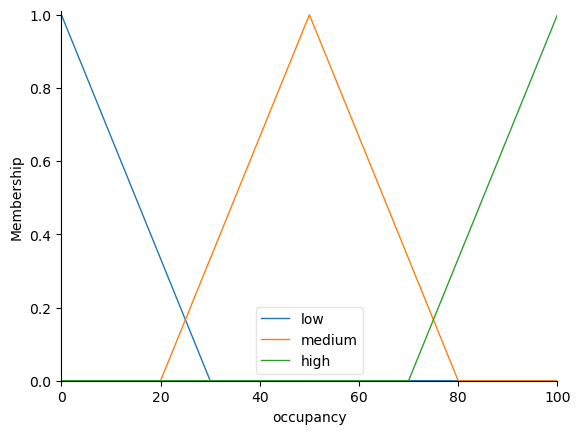

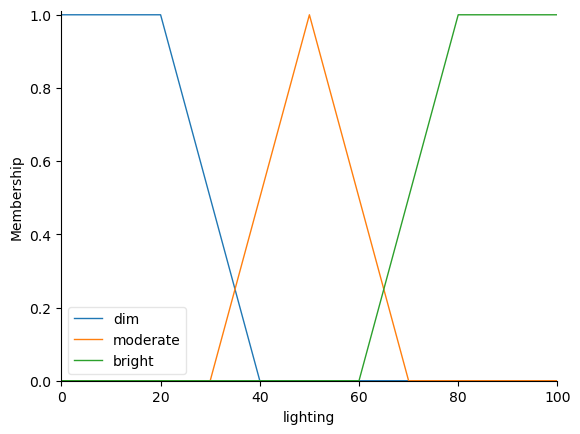

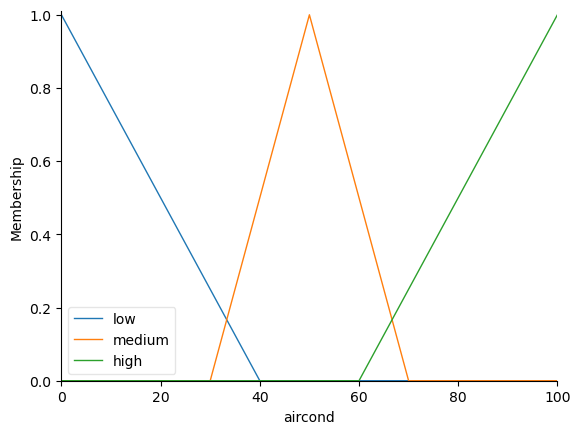

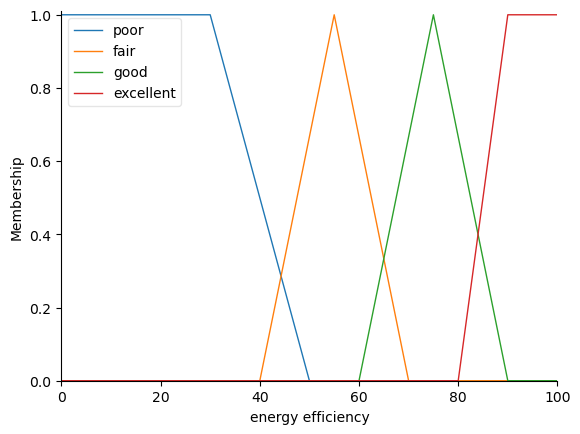

In [7]:
# Visualize membership functions
occupancy.view()
lighting.view()
aircond.view()
efficiency.view()



In [8]:
# Inputs for testing
occ_val = 23.96
light_val = 25.64
ac_val = 2.51


In [9]:
# Degree of Membership
# Calculate membership degrees for each input
occupancy_membership = {
    'low': fuzz.interp_membership(x, occupancy['low'].mf, occ_val),
    'medium': fuzz.interp_membership(x, occupancy['medium'].mf, occ_val),
    'high': fuzz.interp_membership(x, occupancy['high'].mf, occ_val)
}

lighting_membership = {
    'dim': fuzz.interp_membership(x, lighting['dim'].mf, light_val),
    'moderate': fuzz.interp_membership(x, lighting['moderate'].mf, light_val),
    'bright': fuzz.interp_membership(x, lighting['bright'].mf, light_val)
}

aircond_membership = {
    'low': fuzz.interp_membership(x, aircond['low'].mf, ac_val),
    'medium': fuzz.interp_membership(x, aircond['medium'].mf, ac_val),
    'high': fuzz.interp_membership(x, aircond['high'].mf, ac_val)
}


# Print results
print("Occupancy Membership Degrees:")
for label, value in occupancy_membership.items():
    print(f"  {label}: {value:.4f}", end='')

print("\nLighting Membership Degrees:")
for label, value in lighting_membership.items():
    print(f"  {label}: {value:.4f}", end='')

print("\nAircond Membership Degrees:")
for label, value in aircond_membership.items():
    print(f"  {label}: {value:.4f}", end='')



Occupancy Membership Degrees:
  low: 0.2013  medium: 0.1320  high: 0.0000
Lighting Membership Degrees:
  dim: 0.7180  moderate: 0.0000  bright: 0.0000
Aircond Membership Degrees:
  low: 0.9373  medium: 0.0000  high: 0.0000

In [10]:
# Degree of Membership
# Calculate membership degrees for each input
occupancy_membership = {
    'low': fuzz.interp_membership(x, occupancy['low'].mf, occ_val),
    'medium': fuzz.interp_membership(x, occupancy['medium'].mf, occ_val),
    'high': fuzz.interp_membership(x, occupancy['high'].mf, occ_val)
}

lighting_membership = {
    'dim': fuzz.interp_membership(x, lighting['dim'].mf, light_val),
    'moderate': fuzz.interp_membership(x, lighting['moderate'].mf, light_val),
    'bright': fuzz.interp_membership(x, lighting['bright'].mf, light_val)
}

aircond_membership = {
    'low': fuzz.interp_membership(x, aircond['low'].mf, ac_val),
    'medium': fuzz.interp_membership(x, aircond['medium'].mf, ac_val),
    'high': fuzz.interp_membership(x, aircond['high'].mf, ac_val)
}


# Print results
print("Occupancy Membership Degrees:")
for label, value in occupancy_membership.items():
    print(f"  {label}: {value:.4f}", end='')

print("\nLighting Membership Degrees:")
for label, value in lighting_membership.items():
    print(f"  {label}: {value:.4f}", end='')

print("\nAircond Membership Degrees:")
for label, value in aircond_membership.items():
    print(f"  {label}: {value:.4f}", end='')



Occupancy Membership Degrees:
  low: 0.2013  medium: 0.1320  high: 0.0000
Lighting Membership Degrees:
  dim: 0.7180  moderate: 0.0000  bright: 0.0000
Aircond Membership Degrees:
  low: 0.9373  medium: 0.0000  high: 0.0000

In [12]:
rule_base = [
    ('low', 'dim', 'low', 'excellent'),
    ('low', 'dim', 'medium', 'good'),
    ('low', 'dim', 'high', 'fair'),
    ('low', 'moderate', 'low', 'good'),
    ('low', 'moderate', 'medium', 'fair'),
    ('low', 'moderate', 'high', 'poor'),
    ('low', 'bright', 'low', 'fair'),
    ('low', 'bright', 'medium', 'poor'),
    ('low', 'bright', 'high', 'poor'),
    ('medium', 'dim', 'low', 'fair'),
    ('medium', 'dim', 'medium', 'good'),
    ('medium', 'dim', 'high', 'fair'),
    ('medium', 'moderate', 'low', 'fair'),
    ('medium', 'moderate', 'medium', 'excellent'),
    ('medium', 'moderate', 'high', 'good'),
    ('medium', 'bright', 'low', 'fair'),
    ('medium', 'bright', 'medium', 'good'),
    ('medium', 'bright', 'high', 'fair'),
    ('high', 'dim', 'low', 'poor'),
    ('high', 'dim', 'medium', 'fair'),
    ('high', 'dim', 'high', 'fair'),
    ('high', 'moderate', 'low', 'fair'),
    ('high', 'moderate', 'medium', 'excellent'),
    ('high', 'moderate', 'high', 'good'),
    ('high', 'bright', 'low', 'fair'),
    ('high', 'bright', 'medium', 'good'),
    ('high', 'bright', 'high', 'good'),
]

print("\nRule Evaluation (Firing Strengths):")
for i, (occ, light, ac, eff) in enumerate(rule_base, 1):
    firing_strength = min(
        occupancy_membership[occ],
        lighting_membership[light],
        aircond_membership[ac]
    )
    if firing_strength > 0:
        print(f"Rule {i}: IF occupancy is {occ} AND lighting is {light} AND aircond is {ac} \nTHEN efficiency is {eff}", end='')
        print(f"  -> Firing strength: {firing_strength:.4f}")


Rule Evaluation (Firing Strengths):
Rule 1: IF occupancy is low AND lighting is dim AND aircond is low 
THEN efficiency is excellent  -> Firing strength: 0.2013
Rule 10: IF occupancy is medium AND lighting is dim AND aircond is low 
THEN efficiency is fair  -> Firing strength: 0.1320


In [ ]:
# Step 3: Aggregation
# Initialize max degrees for each efficiency label
agg_strengths = {'poor': 0, 'fair': 0, 'good': 0, 'excellent': 0}

# Loop through all rules again
for (occ, light, ac, eff) in rule_base:
    firing_strength = min(
        occupancy_membership[occ],
        lighting_membership[light],
        aircond_membership[ac]
    )
    if firing_strength > agg_strengths[eff]:
        agg_strengths[eff] = firing_strength

# Print results
print("\nAggregated Output Membership Degrees\n(Max Rule Strengths):")
for label, value in agg_strengths.items():
    print(f"  {label.capitalize():<10} = {value:.4f}")



In [ ]:
# Feed inputs to the simulation
efficiency_sim.input['occupancy'] = occ_val
efficiency_sim.input['lighting'] = light_val
efficiency_sim.input['aircond'] = ac_val

# Compute result
efficiency_sim.compute()


print(f"Defuzzified Energy Efficiency Score: {efficiency_sim.output['energy efficiency']:.2f}")


In [ ]:
# Visualize Output
occupancy.view(sim=efficiency_sim)
lighting.view(sim=efficiency_sim)
aircond.view(sim=efficiency_sim)

efficiency.view(sim=efficiency_sim)
